## K-means
#### iris 분류 

In [8]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

iris=load_iris()

In [4]:
x_data=iris.data[:,:2]
y_data=iris.target

In [5]:
x_data

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

Text(0, 0.5, 'sepal Width')

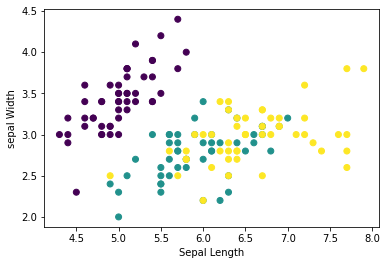

In [9]:
plt.scatter(x_data[:,0],x_data[:,1],c=y_data)
plt.xlabel('Sepal Length')
plt.ylabel('sepal Width')

In [10]:
from sklearn.cluster import KMeans

In [11]:
km=KMeans(n_clusters=3, random_state=102)
km.fit(x_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=102, tol=0.0001, verbose=0)

In [13]:
centers=km.cluster_centers_
print(centers)

[[5.006      3.428     ]
 [6.81276596 3.07446809]
 [5.77358491 2.69245283]]


In [17]:
new_labels=km.labels_

Text(0.5, 1.0, 'Predicted')

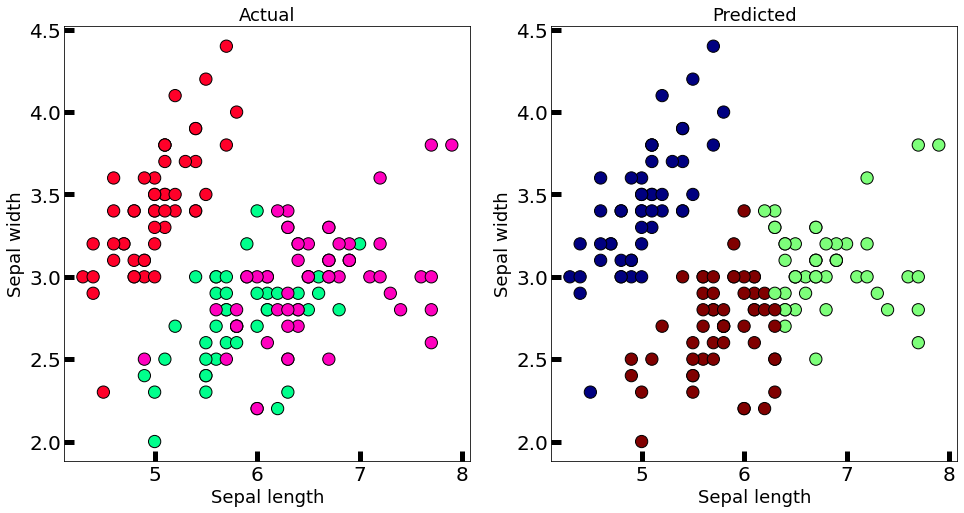

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(x_data[:, 0], x_data[:, 1], c=y_data, cmap='gist_rainbow', edgecolor='k', s=150)
axes[1].scatter(x_data[:, 0], x_data[:, 1], c=new_labels, cmap='jet', edgecolor='k', s=150)

axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)

axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)

axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

In [19]:
iris_df=pd.DataFrame(iris.data,columns=iris.feature_names)
iris_df['target']=pd.DataFrame(iris.target)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [20]:
iris_df['new labels']=new_labels
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,new labels
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


In [23]:
iris_result=iris_df.groupby(["target","new labels"])["sepal length (cm)"].count()
iris_result

target  new labels
0       0             50
1       1             12
        2             38
2       1             35
        2             15
Name: sepal length (cm), dtype: int64

####  make_plobs() : 군집화용 데이터 생성

In [24]:
from sklearn.datasets import make_blobs

In [26]:
X,y=make_blobs(n_samples=150, n_features=2, centers=3, random_state=10)

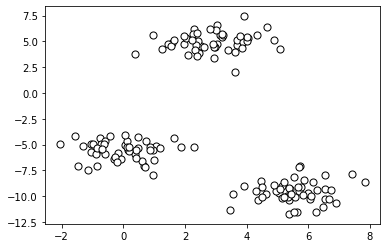

In [28]:
plt.scatter(X[:,0],X[:,1],c='white',marker='o',edgecolor='black',s=50)
plt.show()

In [30]:
km=KMeans(n_clusters=3,random_state=102)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=102, tol=0.0001, verbose=0)

In [31]:
y_km=km.labels_

In [32]:
y_km

array([2, 0, 0, 2, 2, 0, 2, 0, 1, 1, 0, 0, 2, 1, 0, 0, 0, 1, 0, 2, 1, 1,
       2, 1, 2, 1, 1, 2, 0, 0, 1, 1, 2, 0, 1, 2, 1, 0, 1, 0, 2, 2, 0, 0,
       1, 2, 0, 0, 2, 0, 0, 2, 2, 1, 1, 1, 2, 1, 0, 0, 0, 1, 0, 1, 2, 1,
       2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 0, 1, 2, 1, 2, 0, 2, 0, 2,
       0, 2, 2, 1, 1, 0, 0, 0, 2, 0, 2, 2, 1, 1, 1, 2, 0, 0, 1, 0, 1, 0,
       0, 2, 0, 0, 1, 1, 1, 0, 1, 2, 2, 2, 2, 1, 0, 0, 1, 1, 0, 1, 2, 1,
       2, 0, 1, 2, 2, 2, 0, 2, 1, 0, 2, 0, 0, 0, 2, 2, 1, 2])

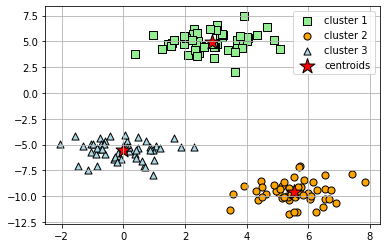

In [42]:
#군집별 표시
plt.scatter(X[y_km==0,0],X[y_km==0,1],s=50,c='lightgreen',marker='s',edgecolor='black',label='cluster 1')
plt.scatter(X[y_km==1,0],X[y_km==1,1],s=50,c='orange',marker='o',edgecolor='black',label='cluster 2')
plt.scatter(X[y_km==2,0],X[y_km==2,1],s=50,c='lightblue',marker='^',edgecolor='black',label='cluster 3')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=250,marker='*',c='red',edgecolor='black',label='centroids')
plt.legend()
plt.grid()
plt.show()

- #### k 를 4로 할경우 

In [36]:
km2=KMeans(n_clusters=4,random_state=102)
y_km2=km2.fit_predict(X)

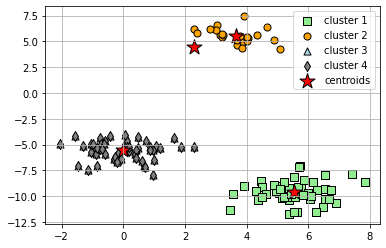

In [41]:
#군집별 표시
plt.scatter(X[y_km2==0,0],X[y_km2==0,1],s=50,c='lightgreen',marker='s',edgecolor='black',label='cluster 1')
plt.scatter(X[y_km2==1,0],X[y_km2==1,1],s=50,c='orange',marker='o',edgecolor='black',label='cluster 2')
plt.scatter(X[y_km2==2,0],X[y_km2==2,1],s=50,c='lightblue',marker='^',edgecolor='black',label='cluster 3')
plt.scatter(X[y_km2==2,0],X[y_km2==2,1],s=50,c='gray',marker='d',edgecolor='black',label='cluster 4')
plt.scatter(km2.cluster_centers_[:,0],km2.cluster_centers_[:,1],s=250,marker='*',c='red',edgecolor='black',label='centroids')
plt.legend()
plt.grid()
plt.show()

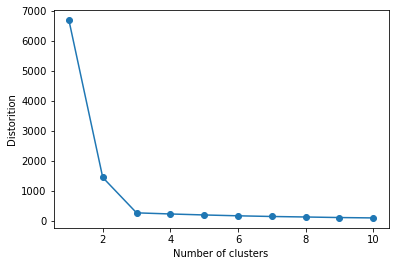

In [45]:
distoritions=[]

for i in range(1,11):
    km=KMeans(n_clusters=i, random_state=102)
    km.fit(X)
    distoritions.append(km.inertia_)

plt.plot(range(1,11),distoritions,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distorition')
plt.show()